<a href="https://colab.research.google.com/github/cannel14/-Classification-Analysis-Supervised-Learning-/blob/main/autopay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Interswitch Revenue Line Analysis and Customer Analysis.**

In [3]:
pip install pymysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 KB 5.1 MB/s eta 0:00:00


In [1]:
pip install pypyodbc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pypyodbc: filename=pypyodbc-1.3.6-py3-none-any.whl size=22873 sha256=3b7357a650660b41227ff1fd8cccdcbe8a9e1df70721a36542a6fdbc4ee7d294
  Stored in directory: /root/.cache/pip/wheels/4a/b0/00/a014827d8966a4b2601f6bff537634a1fe3e7b4269fe668879
Successfully built pypyodbc


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
import pypyodbc as odbc

In [7]:
DRIVER_NAME = 'SQL SERVER'
SERVER_NAME = 'WIN-G22G6P0KNU8'
DATABASE_NAME = 'ReportsKE'


connection_string = f"""
  DRIVER={{{DRIVER_NAME}}};
  SERVER={SERVER_NAME};
  DATABASE={DATABASE_NAME};
  Trust_connection=yes;
  uid=<mainac>;
  pwd=<#Karuiru74>;
"""

conn = odbc.connect(connection_string)
print(conn)


OperationalError: ignored

In [8]:
# Connect to the database
conn = pymysql.connect(
    host='WIN-G22G6P0KNU8',
    user='mainac',
    password='#Karuiru74',
    database='ReportsKE'
)

# Create a DataFrame by querying the database
df = pd.read_sql('SELECT * FROM dbo.Wallet_Trasnactions', conn)

# Close the database connection
conn.close()

# Print the DataFrame
print(df.head(5))

OperationalError: ignored

Reading our data from revuenline report in excel format, from workshee Data, indexing with the ledger Account.

In [ ]:
data = pd.read_excel("/content/Revenue Line Report FY 2022.xlsx", sheet_name="Data", index_col="Ledger Account")
data.head()

,Revenue Line,Customer Vendor,Posting Date,Amount
Ledger Account,,,,
F41017,Verve ID revenue,ABC Bank,2022-03-31,2254000.0
F54025,ATMs - Outsourcing Fee,ABC Bank,2021-12-31,11300.0
F54025,ATMs - Outsourcing Fee,ABC Bank,2022-01-31,11365.0
F54025,ATMs - Outsourcing Fee,ABC Bank,2022-03-30,11475.0
F54025,ATMs - Outsourcing Fee,ABC Bank,2021-08-31,5484.0


Basicaly, we've 1,048,573 ledger entries. Which includes 4 features: Revenue Line, Customer Vendor, Posting Date and Amount transacted. 

In [ ]:
data.info()
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 1048573 entries, F41017 to nan
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Revenue Line     26300 non-null    object        
 1   Customer Vendor  26300 non-null    object        
 2   Posting Date     26300 non-null    datetime64[ns]
 3   Amount           1048573 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 40.0+ MB
(1048573, 4)


From, the data description above, we note that there's no missing data, revenue line and customer vendor are sring datatype, Amount is float and Posting Date is date. Therefore we can proceed with our analysis.

In [ ]:
#Exploratory Data Analysis

Our Data is From 2021-April-01 to 2022-March-31, hence this data is for FY 2021/2022.
Which equals to 364 days.

---



In [ ]:
start_date = data['Posting Date'].min()
end_date = data['Posting Date'].max()
number_of_days = start_date - end_date
print("start date: ",start_date)
print("ending date:" ,end_date)
print("number of days: ", number_of_days)

start date:  2021-04-01 00:00:00
ending date: 2022-03-31 00:00:00
number of days:  -364 days +00:00:00


Interswitch has a Total of 28 revenue lines.


In [ ]:
data['Revenue Line'].nunique()

28

Below is the list of Revenue lines.

In [ ]:
data['Revenue Line'].unique()

array(['Verve ID revenue', 'ATMs - Outsourcing Fee',
       'Enterprise-Implementation Revenue', 'Autopay Transaction Fee',
       'Payment Gateway & Autogate Transaction Revenues',
       'Support and Maintenance', 'Hardware,Software & Licenses Revenue',
       'Pure Playing Switching fee', 'TPP Processing Fee',
       'e-Pins Revenue', 'SMS Revenue',
       'Enterprise Solutions Recurring Revenue',
       'Point of Sale Devices Revenue', 'Bill payment revenue',
       '3D Secure Income', 'Transaction Control',
       'Mobile Money Transaction Fees', 'Verve  Scheme Fees',
       'Verve Cards sales', 'Paycode Revenue', 'In-App Payments Revenue',
       'Dynamic Currency Conversion', 'POS Maintenance Revenue',
       'Mvisa Fees', 'Agency Banking', 'Remittances',
       'SmartHealth Hosting Fees', 'Convenience Fees (Bill payment)', nan],
      dtype=object)

Below is the number of ledger transactions per revenue line.

In [ ]:
Total_Revenue_Generated = data["Amount"].sum().round(2)
print("Total Revenue Generated: ", Total_Revenue_Generated)
print("Total mean monthly revenue Generated: ", (Total_Revenue_Generated/12).round(2))


Total Revenue Generated:  400547200.0
Total mean monthly revenue Generated:  33378933.33


using Freedman Diacoins rule: h=2⋅IQR(x)n−1/3, k = (max()-min())/ h

In [ ]:
h = 2*(((0.75*data['Amount'])- (0.25*data['Amount']))/(np.cbrt(1048573)))

In [ ]:

k = (max(data['Amount'])-min(data['Amount']))/h

In [ ]:
pip install histograms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for histograms: filename=histograms-1.0.0-py3-none-any.whl size=7082 sha256=7fdbaf5928d65aa41f9bbf469434c47688c3075431f5182a404eb572a6b6c3cb
  Stored in directory: /root/.cache/pip/wheels/62/73/4c/7732b3b0609d605a6611ece8af6fb72b999b04e81180b2702e
Successfully built histograms


ValueError: ignored

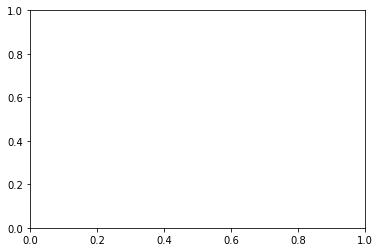

In [ ]:
from histograms import histograms as hist
width = k.max()-k.min()
plt.hist
plt.show()

In [ ]:
data["Revenue Line"].value_counts()

Interswitch as at march 2022 had a total of 91 customers. 

In [ ]:
data["Customer Vendor"].nunique()

These customers include:

In [ ]:
data["Customer Vendor"].unique()

array(['ABC Bank', 'Access Bank Kenya', 'Africa Sokoni IPG',
       'Altron BTG Kenya Limited', 'Credit Bank Limited',
       'Diamond Trust Bank', 'DIB BANK KENYA LIMITED',
       'Kenya Commercial Bank Ltd', 'Prime Bank',
       'National Bank of Commerce(NBC) Tanzania', 'APA IPG',
       'Asante FinancialnServices', 'Bank Of Baroda', 'Bank of Baroda',
       'Bellmac IPG', 'Capsule Limited', 'NCBA BANK KENYA PLC',
       'Cellulant Billers', 'Chipper Cash IPG',
       'Solutions Savings & Credit Cooperative Society Ltd',
       'Dahabshil Bank International Ltd', 'DFCU Bank Limited',
       'Diamond Trust Bank Tanzania', 'Diamond Trust Bank Uganda',
       'Dimension Credit', 'Dimension Next Sacco',
       'EMU-INYA ENTERPRISES LTD-GETBUCKS', 'Fahari Point Limited',
       'Family Bank Limited', 'Faulu Kenya', 'FINAPLUS LIMITED',
       'First Community Bank', 'Genghis Capital Limited', 'Getbucks',
       'GIKERA AND VADGAMA', 'Guaranty Trust Bank Ltd', 'Guardian Bank ',
       'Gus

Below is the number of ledger transactions per customer line.

In [ ]:
data["Customer Vendor"].value_counts().head(30)

Kenswitch                                             6829
Kenya Commercial Bank Ltd                             2282
NCBA BANK KENYA PLC                                   2153
National Bank Of Kenya Ltd                            1701
Sidian Bank                                           1352
Credit Bank Limited                                   1322
Diamond Trust Bank                                    1256
Family Bank Limited                                   1211
Guaranty Trust Bank Ltd                               1130
Faulu Kenya                                           1119
Sky Gardens                                            693
Paynet Kenya Verve                                     655
DIB BANK KENYA LIMITED                                 429
Prime Bank                                             415
Bank Of Baroda                                         410
Username Investment                                    401
TangazoLetu Autopay                                    3

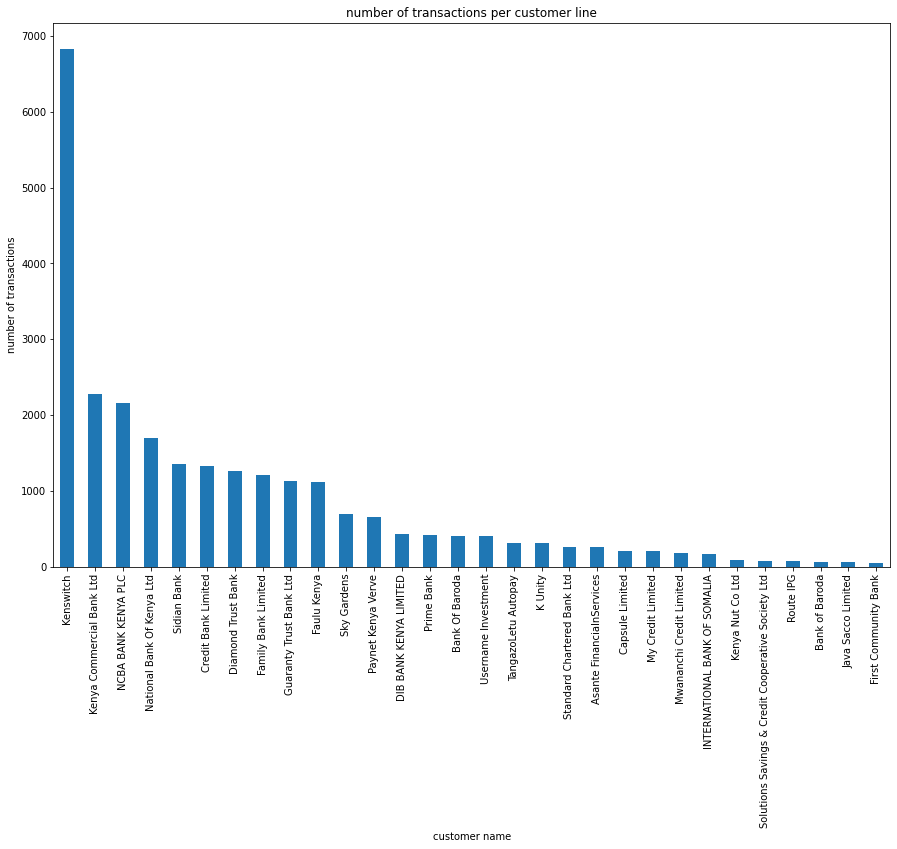

In [ ]:
fig = plt.figure(figsize=(15, 10))
data["Customer Vendor"].value_counts().head(30).plot(kind='bar')
plt.xlabel("customer name")
plt.ylabel("number of transactions")
plt.title("number of transactions per customer line");

In these table we sort the values based on Amount generated by Each revenue line for the whole FY 2021/2022:

In [ ]:
highest_paying_products = data.groupby('Revenue Line')['Amount'].sum().round(2).reset_index().sort_values(by='Amount',ascending=True)
highest_paying_products

,Revenue Line,Amount
5,Convenience Fees (Bill payment),0.000000e+00
18,Remittances,5.720425e+04
12,Mvisa Fees,8.598375e+04
14,Paycode Revenue,1.379320e+05
2,Agency Banking,3.906000e+05
11,Mobile Money Transaction Fees,6.047263e+05
4,Bill payment revenue,7.039453e+05
24,Verve Scheme Fees,7.932998e+05
10,In-App Payments Revenue,7.967333e+05
23,Transaction Control,8.553038e+05


In these table we sort the values based on Average Amount generated by Each revenue line for the whole FY 2021/2022:

In [ ]:
Mean_paying_products = data.groupby('Revenue Line')['Amount'].mean().round(2).reset_index().sort_values(by='Amount',ascending=True)
Mean_paying_products

,Revenue Line,Amount
5,Convenience Fees (Bill payment),0.00
17,Pure Playing Switching fee,425.50
3,Autopay Transaction Fee,2422.88
18,Remittances,7150.53
12,Mvisa Fees,7165.31
15,Payment Gateway & Autogate Transaction Revenues,7692.38
14,Paycode Revenue,11494.33
27,e-Pins Revenue,12318.88
11,Mobile Money Transaction Fees,21597.37
24,Verve Scheme Fees,27355.17


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


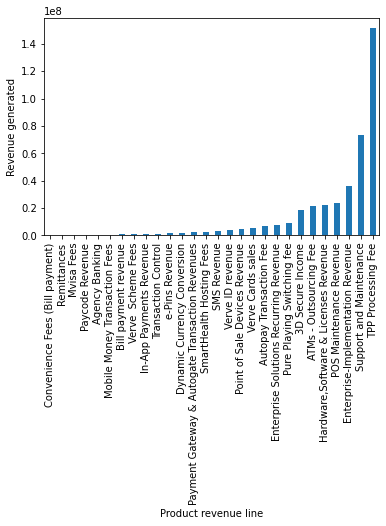

In [ ]:
data.groupby('Revenue Line')['Amount'].sum().sort_values().plot(kind="bar")
plt.xlabel("Product revenue line")
plt.ylabel("Revenue generated");

In [ ]:
highest_Vendor_products = data.groupby('Customer Vendor')['Amount'].sum().round(2)
highest_Vendor_products

Customer Vendor
ABC Bank                          3967118.50
APA IPG                            102607.16
Access Bank Kenya                 1233107.40
Africa Sokoni IPG                     502.57
Altron BTG Kenya Limited          1435027.93
                                     ...    
Username Investment                 57813.00
Uwin Iwin Incentives (Pty) Ltd    1200000.00
Vertex Hub                            700.00
Vertex Hub Group Limited           383880.00
Zuku                               449051.24
Name: Amount, Length: 91, dtype: float64

In [ ]:
#highest_Vendor_products.plot(kind="bar");